In [9]:
#Problem Statement

In [10]:
# Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [11]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [12]:
#Importing Main Libraries 

In [13]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
#Google Drive is mounted on Google Colab

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
# Defining the path for train and test images

In [17]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [18]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [19]:
#There is Total 2239 images in Train data set
# 118 Images in Test Data

In [20]:
#Create Data set 

In [21]:
batch_size = 32
img_height = 180
img_width = 180

In [22]:
# 80% Image for Train and 20% for Test

In [23]:
## Train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [24]:
## Validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [25]:
# List of all classes of skin cancer . 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [26]:
# Visualize The Data

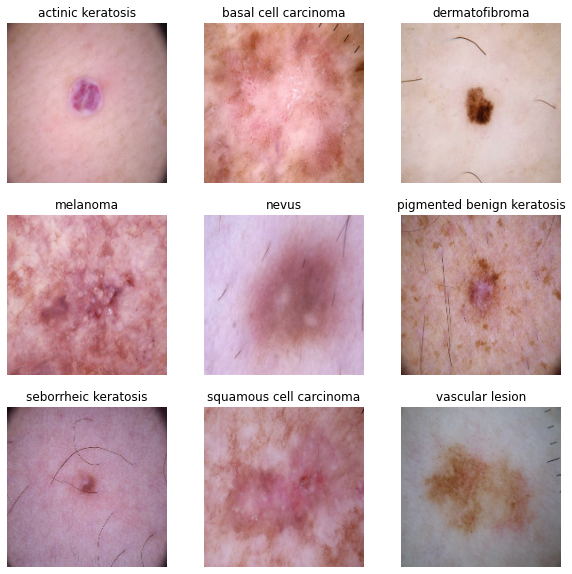

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [28]:
#The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

#Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
# 1st Model Creation


In [31]:
num_classes = 9

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [32]:
# Model Compilation

In [33]:
### Todo, choose an appropirate optimiser and loss function
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
# View the summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [35]:
# Train the Model

In [36]:
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


281/281 [==============================] - 2288s 2s/step - loss: 1.5781 - accuracy: 0.4017 - val_loss: 1.2225 - val_accuracy: 0.5532
Epoch 2/20
281/281 [==============================] - 12s 43ms/step - loss: 1.1344 - accuracy: 0.5825 - val_loss: 1.1207 - val_accuracy: 0.5861
Epoch 3/20
281/281 [==============================] - 12s 42ms/step - loss: 0.8233 - accuracy: 0.7092 - val_loss: 0.7873 - val_accuracy: 0.7196
Epoch 4/20
281/281 [==============================] - 12s 43ms/step - loss: 0.5981 - accuracy: 0.7839 - val_loss: 0.5590 - val_accuracy: 0.8073
Epoch 5/20
281/281 [==============================] - 12s 43ms/step - loss: 0.4462 - accuracy: 0.8403 - val_loss: 0.6160 - val_accuracy: 0.8117
Epoch 6/20
281/281 [==============================] - 12s 43ms/step - loss: 0.3438 - accuracy: 0.8779 - val_loss: 0.5267 - val_accuracy: 0.8358
Epoch 7/20
281/281 [==============================] - 12s 43ms/step - loss: 0.3070 - accuracy: 0.8907 - val_loss: 0.5511 - val_accuracy: 0.8482
Epo

In [37]:
#Inferences

#Accuracy for train model is 90.75% and
#accuracy for validation model is 52.35%
#We can conclude that, our model is overfitting.

In [38]:
#Visualizing training results

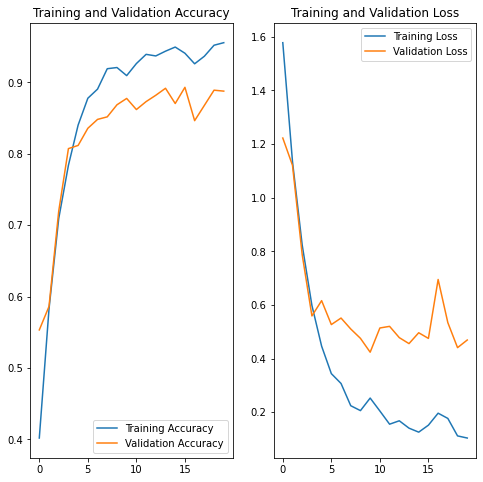

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
#Conclusion :
#After visualising the training result we can conclude that the model is overfitting as there is huge difference in training and validation accuracy.
#Training accuracy is much higher than validation accuracy.

In [41]:
#Thus, we will create new model in order to deal with overfitting

In [42]:
# Data Augumentation.

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

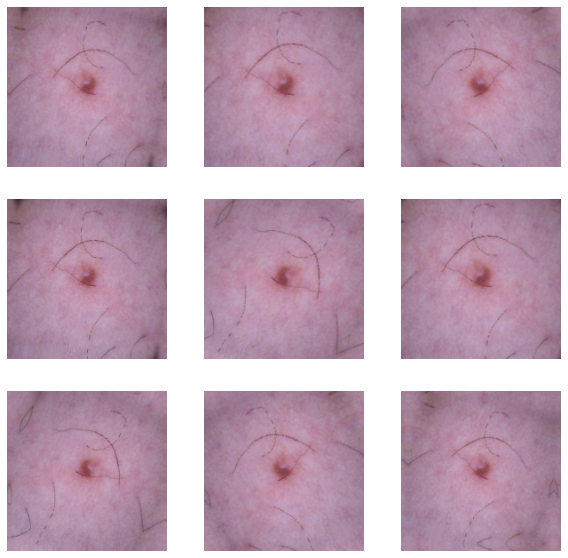

In [43]:
# visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [44]:
# Create the model, compile and train the model

In [45]:
## 2nd Model Creation

In [46]:
## Using Dropout layer as there is an evidence of overfitting in our previous model.

model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [47]:
#Here, we are using 'Dropout' layers at each 'MaxPooling2D' layers to create a CNN model.

In [48]:
# Compiling the model

In [49]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
# Here, we have used 'SparseCategoricalCrossentropy' loss function.

In [51]:
# Training the model

In [52]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


281/281 [==============================] - 14s 47ms/step - loss: 1.9222 - accuracy: 0.2571 - val_loss: 1.6444 - val_accuracy: 0.4068
Epoch 2/20
281/281 [==============================] - 13s 46ms/step - loss: 1.4133 - accuracy: 0.4703 - val_loss: 1.3754 - val_accuracy: 0.4967
Epoch 3/20
281/281 [==============================] - 13s 46ms/step - loss: 1.1224 - accuracy: 0.5883 - val_loss: 1.0731 - val_accuracy: 0.6177
Epoch 4/20
281/281 [==============================] - 13s 46ms/step - loss: 0.9310 - accuracy: 0.6633 - val_loss: 0.9274 - val_accuracy: 0.6680
Epoch 5/20
281/281 [==============================] - 13s 46ms/step - loss: 0.7441 - accuracy: 0.7304 - val_loss: 0.8755 - val_accuracy: 0.6934
Epoch 6/20
281/281 [==============================] - 13s 46ms/step - loss: 0.5991 - accuracy: 0.7819 - val_loss: 0.6875 - val_accuracy: 0.7548
Epoch 7/20
281/281 [==============================] - 13s 46ms/step - loss: 0.5063 - accuracy: 0.8184 - val_loss: 0.5810 - val_accuracy: 0.7926
Epo

In [53]:
#Inferences

#Accuracy for train model is 75.8% and
#accuracy for validation model is 50.56%
# We can conclude that, our model gives better result than previous model.

In [54]:
# Visualizing the Results

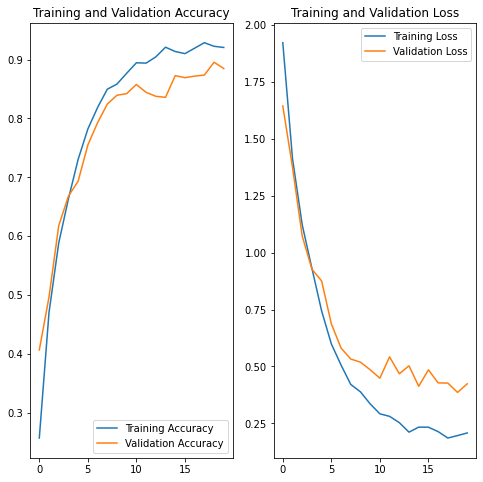

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
# Conclusion :
 #After visualising the training result we can conclude that our model(model2) gives better result than previous model(model1)
 # Distribution of classes in the training dataset.
#Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Text(0, 0.5, 'Number of Images')

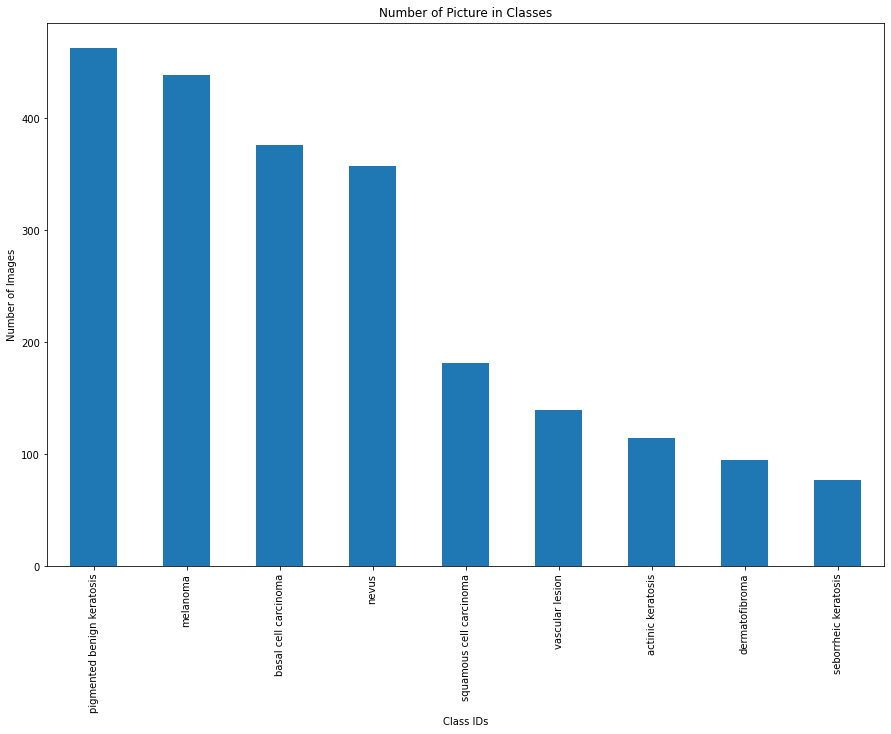

In [57]:
import glob
train_img_names = glob.glob('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/*.jpg')
train_img_names = pd.Series(train_img_names)
train_df = pd.DataFrame()

# Generating Filename field
train_df['File'] = train_img_names.map(lambda img_name: img_name.split("/")[-1])

# Generating ClassId field
train_df['Id'] = train_img_names.map(lambda img_name: img_name.split("/")[-2])

#Counting images belonging to each of 9 classes
class_id_dist = train_df['Id'].value_counts()

fig = plt.figure(figsize=(15,10))
class_id_dist.plot(kind='bar')
plt.title('Number of Picture in Classes')
plt.xlabel('Class IDs')
plt.ylabel('Number of Images')

In [58]:
 # Which class has the least number of samples?
# Ans- seborrheic keratosis
#- Which classes dominate the data in terms proportionate number of samples?
# Ans- pigmented benign keratosis
# Todo: Rectify the class imbalance
# Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [59]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
path_to_training_dataset=str(data_dir_train)+"//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF1F53A5E10>: 100%|██████████| 500/500 [00:18<00:00, 27.68 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF1F53752D0>: 100%|██████████| 500/500 [00:18<00:00, 27.48 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF20E281710>: 100%|██████████| 500/500 [00:18<00:00, 26.64 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF20E123950>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7FF20A071990>: 100%|██████████| 500/500 [01:18<00:00,  6.39 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF20A08FDD0>: 100%|██████████| 500/500 [00:17<00:00, 27.84 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF20A1BFBD0>: 100%|██████████| 500/500 [00:42<00:00, 11.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF20E235550>: 100%|██████████| 500/500 [00:18<00:00, 27.17 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF1F53AE390>: 100%|██████████| 500/500 [00:18<00:00, 26.50 Samples/s]


In [61]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


In [62]:
# Lets see the distribution of augmented data after adding new images to the original training data.

In [63]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029900.jpg_779ffd2d-a38d-476e-af1b-fe98e2cf9db6.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033866.jpg_6035e0de-1bbd-4e4c-bf5c-13969e1fcebe.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027950.jpg_1588dab2-2eca-47bd-8b88-f35c21c3acef.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031292.jpg_17e83ea5-f8ec-4732-be06-041a9faba01b.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032206.jpg_382b871d-3c41

In [64]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [65]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
original_df['Label'].value_counts()

In [ ]:
new_df['Label'].value_counts()

In [ ]:
# So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# Todo: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Todo: Create a training dataset
# 3rd Model

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size = (img_height, img_width),
  batch_size=batch_size)

In [ ]:
# Found 6739 files belonging to 9 classes.
# Using 5392 files for training

In [ ]:
# Todo: Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
# Found 6739 files belonging to 9 classes.
# Using 1347 files for validation.

In [ ]:
# Todo: Create your model (make sure to include normalization)

In [ ]:
## your code goes here
num_classes = 9

model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
# Todo: Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Todo: Train your model

In [ ]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epochs
)

In [ ]:
# Inferences

# Accuracy for train model is 94.83% and
# accuracy for validation model is 78.92%
# We can conclude that, our model gives better result than previous model.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
Conclusion :
#After visualising the results we can conclude that we can achieve high training as well as validation accuracy.

# Also the difference between their accuracies is reduced.
# Thus no sign of overfitting. Clearly, class rebalance helped us to create optimised model.